In [2]:
import numpy as np
import matplotlib.pylab as plt
import scipy.misc
%matplotlib inline

import os
import sys
import struct
import random

def read_train(path):
    fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    fname_img = os.path.join(path, 'train-images.idx3-ubyte')
    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    return lbl,img

def read_test(path):
    fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    return lbl,img

class mnist(object):
    def __init__(self,path,r_train=0.9):
        labels_all, images_all = read_train(path)
        
        images_all = images_all[(labels_all==0) | (labels_all==1)]# | (labels_all==2)]
        labels_all = labels_all[(labels_all==0) | (labels_all==1)]# | (labels_all==2)]
        
        from sklearn import preprocessing
        lb = preprocessing.LabelBinarizer()
        labels_all = lb.fit_transform(labels_all)

        self.n_data = labels_all.shape[0]
        inds = np.arange(self.n_data)
        random.shuffle(inds)
        
        images_all = images_all.reshape(self.n_data,-1)
        print images_all.shape
        images_all = images_all/255.
        
        self.r_train = r_train
        self.n_train = int(r_train*self.n_data)
        self.n_test = self.n_data-self.n_train
        
        self.train_set = images_all[:self.n_train]
        self.train_label = labels_all[:self.n_train]
        
        self.test_set = images_all[self.n_train:]
        self.test_label = labels_all[self.n_train:]

In [4]:
mnist = mnist('./data/mnist')

(12665, 784)


In [10]:
n0,n1 = 0,0
for i in range(mnist.train_label.shape[0]):  
    x = mnist.train_set[i].reshape(28,28)
    y = mnist.train_label[i]
    if y==0:
        n0 += 1
        scipy.misc.imsave('./MNIST_images/zero_'+str(n0)+'.png', x)
    if y==1:
        n1 += 1
        scipy.misc.imsave('./MNIST_images/one_'+str(n1)+'.png', x)

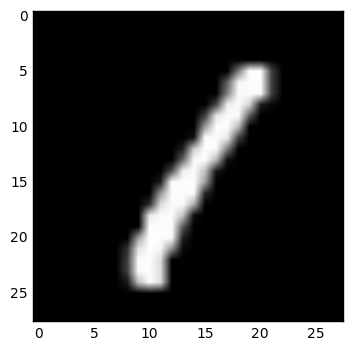

In [12]:
xr = scipy.misc.imread('./MNIST_images/one_1.png')
plt.imshow(xr,cmap='gray')